<a href="https://colab.research.google.com/github/tuntul17/FIZ437E/blob/main/FIZ437E_HW1_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
#IMPORTING NECESSARY LIBRARİES
import math as mt
import numpy as np
from pylab import *
import scipy.special as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

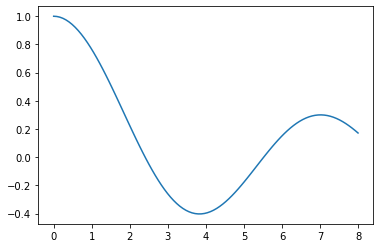

In [159]:
#J0(x) => (0,8)
x = np.linspace(0,8,100)
J0 = sp.jv(0,x)
plot(x,J0)

In [161]:
#Now add the noise
# J_0 (x) + 1/10 * N(0,1) 
# 20, 100, 1000, 10ˆ4 data points in order
x0 = np.linspace(0,8,10)
j0 = sp.jv(0,x0) + np.random.normal(0,1,len(x0))/10
x20 = np.linspace(0,8,20)
j20 = sp.jv(0,x20) +np.random.normal(0,1,len(x20))/10
x100 = np.linspace(0,8,100)
j100 = sp.jv(0,x100) + np.random.normal(0,1,len(x100))/10
x13 = np.linspace(0,8,1000) 
j13 = sp.jv(0,x13) + np.random.normal(0,1,len(x13))/10
x14 = np.linspace(0,8,10**4)
j14 = sp.jv(0,x14) + np.random.normal(0,1,len(x14))/10

In [ ]:
scatter(x0,j0,marker = "1",c="r")
plot(x,J0)

In [170]:
#SEPARETE TRAINING DATA AND TEST DATA:
x0_train,x0_test,j0_train,j0_test = train_test_split(x0,j0,train_size =0.8)

x20_train,x20_test,j20_train,j20_test = train_test_split(x20,j20,train_size =0.8)

x100_train,x100_test,j100_train,j100_test = train_test_split(x100,j100,train_size =0.8)

x13_train,x13_test,j13_train,j13_test  = train_test_split(x13,j13,train_size =0.8)

x14_train,x14_test,j14_train,j14_test = train_test_split(x14,j14,train_size = 0.8)


So far I've prepared the training and test data for all the iterations and plot the actual J0(x) graph from 0 to 8

In [ ]:
#It's time to train an 8th order of pol. reg. model #j0(z) = sum over k[0 to 8] ((z^2/4)^k/(k!)^2)*(-1)^k
"""for 10 data points 8 of which to train"""
#plotting
d = 8 
###
polfit = np.poly1d(np.polyfit(x0_train,j0_train,d))
xx = np.linspace(0,8,10)
plot(xx,polfit(xx),c= 'b')
scatter(x0_train,j0_train,marker="1",c='r')
scatter(x0_test,j0_test,c= 'g')
plot(x,J0,c='k')
grid(True)

#test error:
ts_er0 =mean_squared_error(j0_test, polfit(j0_test))
#training error: 
tr_er0 =mean_squared_error(j0_train,polfit(j0_train))

R2_Train = r2_score(j0_train,polfit(x0_train))
R2_Test = r2_score(j0_test,polfit(x0_test))
print(R2_Test)
print(R2_Train)
print("training error: ",tr_er0)
print("test error: ",ts_er0)

In [ ]:
"""for 20 data points 16 of which to train"""

d = 8 
polfit = np.poly1d(np.polyfit(x20_train,j20_train,d))
xx = np.linspace(0,8,20)
plot(xx,polfit(xx),c= 'b')
scatter(x20_train,j20_train,marker="1",c='r')
scatter(x20_test,j20_test,c='g')
plot(x,J0,c='k')
grid(True)

ts_er20 =mean_squared_error(j20_test, polfit(j20_test))
tr_er20 =mean_squared_error(j20_train,polfit(j20_train))

R2_Train = r2_score(j20_train,polfit(x20_train))
R2_Test = r2_score(j20_test,polfit(x20_test))

print(R2_Test)
print(R2_Train)
print("training error: ",tr_er20)
print("test error: ",ts_er20)

In [ ]:
"""for 100 data points ..."""
d = 8 
polfit = np.poly1d(np.polyfit(x100_train,j100_train,d))
xx = np.linspace(0,8,100)
plot(xx,polfit(xx),c= 'b')
scatter(x100_train,j100_train,marker="1",c='r')
scatter(x100_test,j100_test,c='g')
plot(x,J0,c='k')
grid(True)
R2_Train = r2_score(j100_train,polfit(x100_train))
R2_Test = r2_score(j100_test,polfit(x100_test))

ts_er100 =mean_squared_error(j100_test, polfit(j100_test))
tr_er100 =mean_squared_error(j100_train,polfit(j100_train))
print("training error: ",tr_er100)
print("test error: ",ts_er100)
print(R2_Test)
print(R2_Train)

In [ ]:
"""for 1000 data points..."""
d = 8 
polfit = np.poly1d(np.polyfit(x13_train,j13_train,d))
xx = np.linspace(0,8,1000)
plot(xx,polfit(xx),c= 'b')
scatter(x13_train,j13_train,marker="1",c='r',alpha = 0.2)
scatter(x13_test,j13_test,c='g')
plot(x,J0,c='k')
grid(True)
R2_Train = r2_score(j13_train,polfit(x13_train))
R2_Test = r2_score(j13_test,polfit(x13_test))

ts_er13 =mean_squared_error(j13_test, polfit(j13_test))
tr_er13 =mean_squared_error(j13_train,polfit(j13_train))
print("training error: ",tr_er13)
print("test error: ",ts_er13)
print(R2_Test)
print(R2_Train)

In [ ]:
"""10^4 data points"""
d = 8 
polfit = np.poly1d(np.polyfit(x14_train,j14_train,d))
xx = np.linspace(0,8,10**4)
plot(xx,polfit(xx),c= 'b')
scatter(x14_train,j14_train,marker="1",c='r',alpha = 0.02)
scatter(x14_test,j14_test,c='g')
plot(x,J0,c='k')
grid(True)
R2_Train = r2_score(j14_train,polfit(x14_train))
R2_Test = r2_score(j14_test,polfit(x14_test))
ts_er14 =mean_squared_error(j14_test, polfit(j14_test))
tr_er14 =mean_squared_error(j14_train,polfit(j14_train))
print("Training error: ",tr_er14)
print("Test error: ",tr_er14)

print(R2_Test)
print(R2_Train)